In [89]:
import numpy as np
import pandas as pd
import scipy.stats
import warnings
from tqdm import tqdm_notebook

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [96]:
df_spaceship=pd.read_csv('train_ex5.csv')

PassengerId- Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму , gggg_ppгде ggggуказывает группу, с которой путешествует пассажир, и ppявляется их номером в группе. Люди в группе часто являются членами семьи, но не всегда. \
HomePlanet- Планета, с которой вылетел пассажир, как правило, планета его постоянного проживания.\
CryoSleep- Указывает, решил ли пассажир быть переведен в режим анабиоза на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.\
Cabin- Номер каюты, в которой находится пассажир. Принимает вид deck/num/side, где sideможет быть либо Pза левый , либо Sза правый борт .\
Destination- Планета, на которую будет высаживаться пассажир.\
Age- Возраст пассажира.\
VIP- Оплатил ли пассажир специальное VIP-обслуживание во время рейса.\
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .\
Name- Имя и фамилия пассажира.\
Transported- Был ли пассажир перенесён в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.

In [97]:
df_spaceship.shape

(8693, 14)

In [98]:
df_spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Изучим данные и выполним предобработку

In [99]:
df_spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [100]:
df_spaceship.drop(['Name','Cabin'], axis=1, inplace=True)

In [101]:
categorical_col=df_spaceship.select_dtypes(include='object').columns
for col in categorical_col:
    print(col)

PassengerId
HomePlanet
CryoSleep
Destination
VIP


In [102]:
numerical_col=df_spaceship._get_numeric_data().columns
for col in numerical_col:
    print(col)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [103]:
df_spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [104]:
df_spaceship.shape

(8693, 12)

In [105]:
for cat_col in categorical_col:
    df_spaceship[cat_col]=df_spaceship[cat_col].fillna(df_spaceship[cat_col].mode()[0])

In [106]:
for num_col in numerical_col:
    df_spaceship[num_col]=df_spaceship[num_col].fillna(df_spaceship[num_col].mean())

In [107]:
df_spaceship.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [108]:
df_spaceship.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [109]:
df_spaceship.describe(include=['O'])

,PassengerId,HomePlanet,Destination
count,8693,8693,8693
unique,8693,3,3
top,0001_01,Earth,TRAPPIST-1e
freq,1,4803,6097


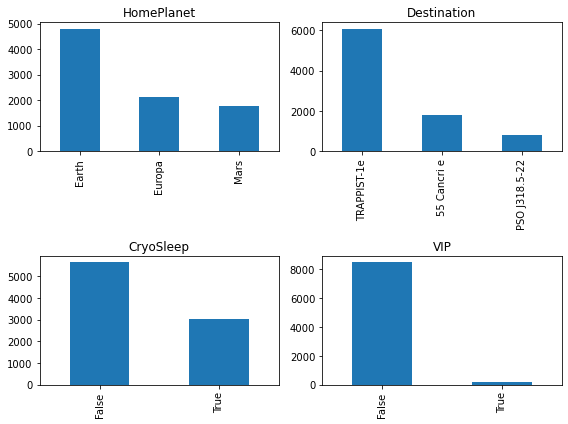

In [110]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
df_spaceship['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df_spaceship['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df_spaceship['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df_spaceship['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout()

In [111]:
df_spaceship=df_spaceship.replace({'CryoSleep':{False: 0, True: 1}, 
                                     'Transported':{False: 0, True: 1}, 
                                     'VIP':{False: 0, True: 1}, 
                                     'HomePlanet':{'Europa': 0, 'Earth': 1, 'Mars': 2}, 
                                     'Destination':{'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, 
                                     'Transported':{False: 0, True: 1}})

<AxesSubplot:>

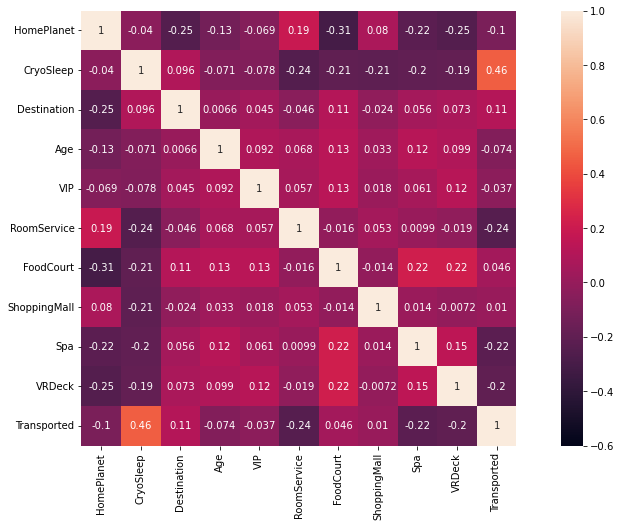

In [112]:
corr_matrix = df_spaceship.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, vmax=1, vmin=-0.6, square=True, annot=True)

## Строим модель

In [122]:
## Зададим 10 бачей для функции кросс-валидации
cv = KFold(n_splits=10)     

## Итоговый список с точностью классификации для каждой итерации
accuracies = list()

## Задание диапазона глубин дерева
max_attributes = len(list(df_spaceship))
depth_range = range(1, max_attributes + 1)

## Перебор всех значений max_depth /  
## Обучение модели для каждого фолда / 
## Расчет точности классификации / 
## Расчет среднего значения точности по всем фолдам
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    for train_fold, valid_fold in cv.split(df_spaceship):
        f_train = df_spaceship.loc[train_fold] 
        f_valid = df_spaceship.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Transported'], axis=1), 
                               y = f_train["Transported"]) 
        valid_acc = model.score(X = f_valid.drop(['Transported'], axis=1), 
                                y = f_valid["Transported"])
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.718279
         2          0.718279
         3          0.707007
         4          0.766144
         5          0.770629
         6          0.768786
         7          0.770742
         8          0.776261
         9          0.771772
        10          0.768090
        11          0.751639
        12          0.747036


Получаем, что оптимальная глубина решающего дерева равняется 8.

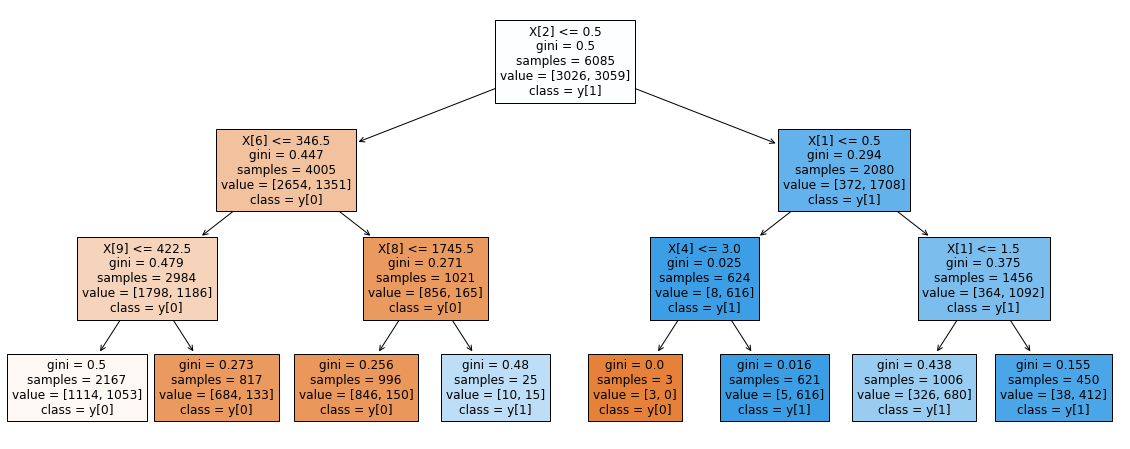

In [120]:
transported = df_spaceship['Transported']
features = df_spaceship.drop('Transported', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, transported, test_size=0.3, random_state=42)

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

plt.figure(figsize=(20, 8))
tr = tree.plot_tree(decision_tree, class_names=True, filled=True)